In [277]:
import pandas as pd

In [278]:
path = "https://raw.githubusercontent.com/rohitgupta29/Hackathron_1/master/hackpredict_homestay/Data/Train.csv"
df = pd.read_csv(path)

In [279]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


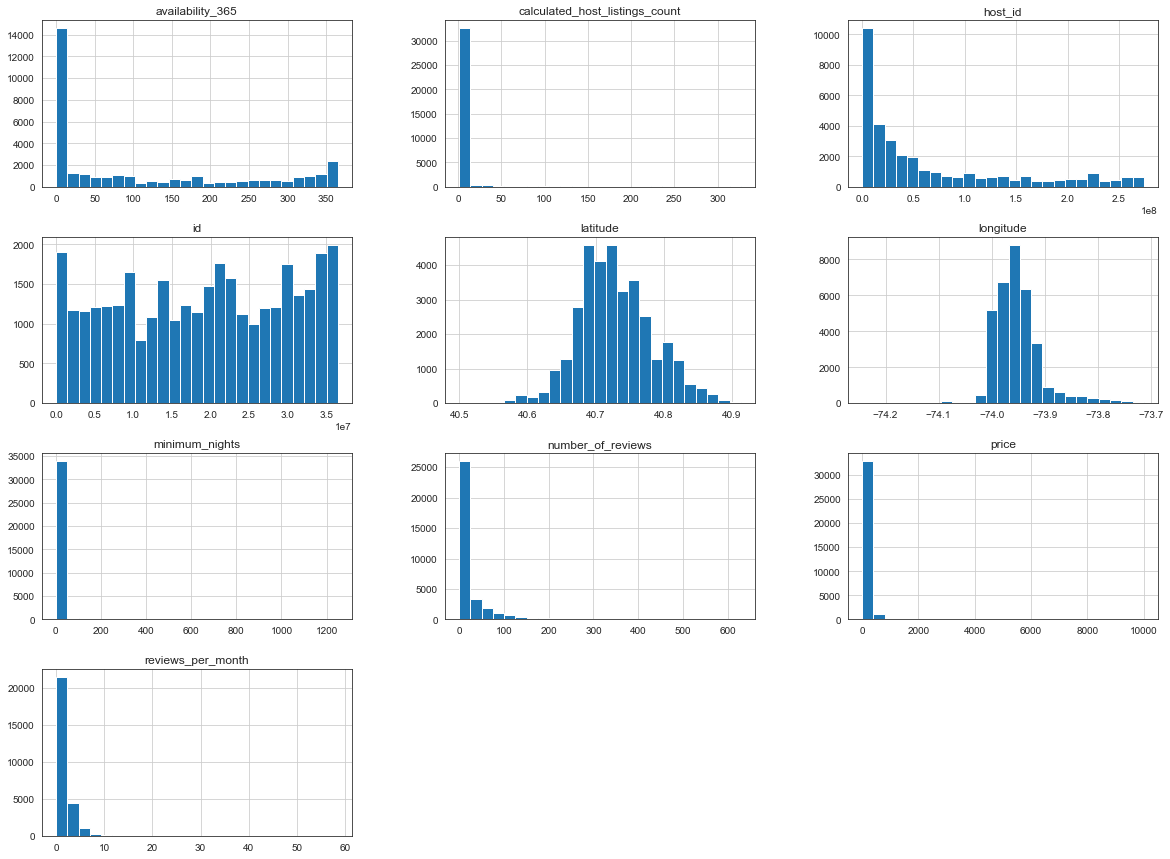

In [280]:
df.drop(["id","host_id"],axis = 1)

%matplotlib inline 
import matplotlib.pyplot as plt

df.hist(bins = 25, figsize = (20,15))
plt.show()

In [281]:
df["neighbourhood_group"].value_counts()

Manhattan        15193
Brooklyn         14033
Queens            3985
Bronx              767
Staten Island      248
Name: neighbourhood_group, dtype: int64

In [283]:
df["room_type"].value_counts()

Entire home/apt    17829
Private room       15594
Shared room          803
Name: room_type, dtype: int64

In [284]:
week = df[df["minimum_nights"] < 7] 
week.shape

(27708, 16)

In [285]:
month = df[df["minimum_nights"] == 30] 
month.shape

(2592, 16)

In [286]:
s_grouped = df.groupby(['neighbourhood_group', 'room_type'])['price']
s_grouped.mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.455224
                     Private room        67.337691
                     Shared room         63.550000
Brooklyn             Entire home/apt    181.116525
                     Private room        76.117872
                     Shared room         52.257353
Manhattan            Entire home/apt    249.621554
                     Private room       117.323456
                     Shared room         88.429412
Queens               Entire home/apt    148.470746
                     Private room        68.716412
                     Shared room         73.767123
Staten Island        Entire home/apt    187.964286
                     Private room        61.198473
                     Shared room         63.400000
Name: price, dtype: float64

In [316]:
ng_grouped = df.groupby(['neighbourhood_group', 'neighbourhood','room_type'])['price']
ng = ng_grouped.median()
ng

neighbourhood_group  neighbourhood  room_type      
Bronx                Allerton       Entire home/apt     90.0
                                    Private room        49.5
                     Baychester     Entire home/apt     95.0
                                    Private room        60.0
                     Belmont        Entire home/apt    273.0
                                                       ...  
Staten Island        Tottenville    Private room       110.0
                     West Brighton  Entire home/apt     99.0
                                    Private room        52.0
                     Westerleigh    Entire home/apt    103.0
                                    Private room        40.0
Name: price, Length: 518, dtype: float64

In [288]:
df[["price"]].describe()

,price
count,34226.000000
mean,153.480979
std,243.312608
min,0.000000
25%,69.000000
50%,107.000000
75%,175.000000
max,10000.000000


### Insights 
- Mean > Median
- Till 75%, maximum price is 175. But, for Q4, it reaches 10000.So, price is between 175 to 10000. So, check outliers.
- Q3 - Q1 = 106

In [289]:
df_75 = df[df["price"] > 4999]
df_75["neighbourhood_group"].value_counts()

Manhattan        12
Brooklyn          6
Staten Island     1
Name: neighbourhood_group, dtype: int64

# Insights 
- Maximum Price in Staten Island is 5000
- Rest, Manhattan have 12 values and Brooklyn have 6 above 5000.

In [290]:
df_1 = df[df["price"] < 100]
df_1["neighbourhood_group"].value_counts()

Brooklyn         7585
Manhattan        4245
Queens           2711
Bronx             581
Staten Island     169
Name: neighbourhood_group, dtype: int64

In [291]:
bronx = df.pivot_table(index=['neighbourhood_group', 'neighbourhood']).iloc[:48]



In [292]:
brooklyn = df.pivot_table(index=['neighbourhood_group','neighbourhood']).iloc[49:95]

In [293]:
manhattan = df.pivot_table(index=['neighbourhood_group', 'neighbourhood']).iloc[96:127]



In [294]:
queens = df.pivot_table(index=['neighbourhood_group', 'neighbourhood']).iloc[127:178]

In [295]:
island = df.pivot_table(index=['neighbourhood_group', 'neighbourhood']).iloc[178:]

In [296]:
df.groupby(["neighbourhood_group"]).mean()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,2.261385e+07,1.036309e+08,40.848595,-73.883367,88.146023,4.631030,27.383312,1.873150,2.301173,170.230769
Brooklyn,1.819319e+07,5.623084e+07,40.684893,-73.951200,125.868880,6.010760,24.331291,1.283696,2.236514,101.232880
Manhattan,1.874741e+07,6.768067e+07,40.765109,-73.974600,197.233002,8.522741,21.193444,1.281022,12.697690,111.915553
Queens,2.179176e+07,9.627394e+07,40.731572,-73.872803,98.661731,4.928231,27.151819,1.933863,4.054203,144.687327
Staten Island,2.161833e+07,9.770193e+07,40.609554,-74.107229,118.491935,3.915323,32.024194,1.839583,2.314516,200.745968


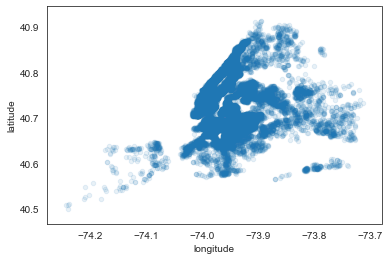

In [297]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

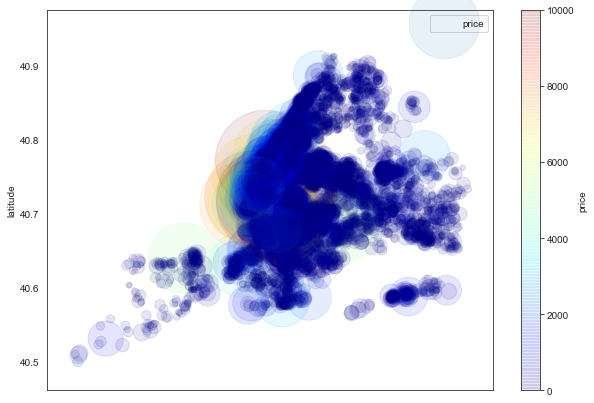

In [298]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1,
       s = df["price"], label = "price", figsize = (10,7),
       c = "price", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

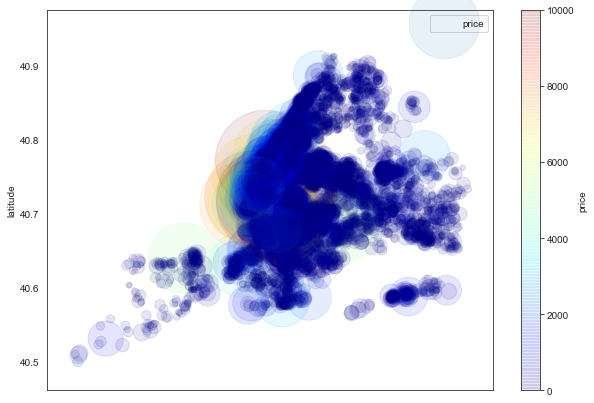

In [299]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1,
       s = df["price"], label = "price", figsize = (10,7),
       c = "price", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

In [300]:
q=df.pivot_table(index=['neighbourhood',"room_type"])
q

availability_365  \
neighbourhood room_type                           
Allerton      Entire home/apt        184.230769   
              Private room           148.222222   
Arden Heights Entire home/apt        185.500000   
              Private room             0.000000   
Arrochar      Entire home/apt        209.714286   
...                                         ...   
Woodlawn      Entire home/apt        172.000000   
              Private room            76.500000   
Woodside      Entire home/apt        138.456522   
              Private room           128.727273   
              Shared room             89.000000   

                               calculated_host_listings_count       host_id  \
neighbourhood room_type                                                       
Allerton      Entire home/apt                        2.384615  1.164584e+08   
              Private room                           2.944444  1.124485e+08   
Arden Heights Entire home/apt                        1.000000  2.278091e+08   
              Private room                           1.000000  5.500445e+07   
Arrochar      Entire home/apt                        2.142857  4.524104e+07   
...                                                       ...           ...   
Woodlawn      Entire home/apt                        1.000000  1.018849e+08   
              Private room                           2.750000  6.993592e+07   
Woodside      Entire home/apt                        1.565217  1.056341e+08   
              Private room                          26.859504  1.055589e+08   
              Shared room                            1.000000  2.511564e+08   

                                         id   latitude  longitude  \
neighbourhood room_type                                             
Allerton      Entire home/apt  2.332260e+07  40.866307 -73.858059   
              Private room     2.086254e+07  40.864681 -73.858523   
Arden Heights Entire home/apt  3.313145e+07  40.553095 -74.186270   
              Private room     2.843173e+07  40.543120 -74.173880   
Arrochar      Entire home/apt  2.189111e+07  40.593103 -74.070323   
...                                     ...        ...        ...   
Woodlawn      Entire home/apt  2.019757e+07  40.899763 -73.867352   
              Private room     2.393384e+07  40.898668 -73.866263   
Woodside      Entire home/apt  2.248892e+07  40.745914 -73.903145   
              Private room     2.452226e+07  40.745777 -73.902531   
              Shared room      3.390689e+07  40.745080 -73.902910   

                               minimum_nights  number_of_reviews       price  \
neighbourhood room_type                                                        
Allerton      Entire home/apt        2.307692          43.384615  117.230769   
              Private room           1.611111          35.666667   73.944444   
Arden Heights Entire home/apt       17.500000           2.000000   76.500000   
              Private room           2.000000           7.000000   41.000000   
Arrochar      Entire home/apt        2.142857          15.142857  234.428571   
...                                       ...                ...         ...   
Woodlawn      Entire home/apt        1.500000          64.750000   65.500000   
              Private room           1.500000          52.750000   52.750000   
Woodside      Entire home/apt        3.521739          33.086957  151.913043   
              Private room          12.330579          12.314050   65.297521   
              Shared room            2.000000           8.000000   65.000000   

                               reviews_per_month  
neighbourhood room_type                           
Allerton      Entire home/apt           2.545000  
              Private room              1.628125  
Arden Heights Entire home/apt           0.950000  
              Private room              0.710000  
Arrochar      Entire home/apt           1.554286  
...                                        

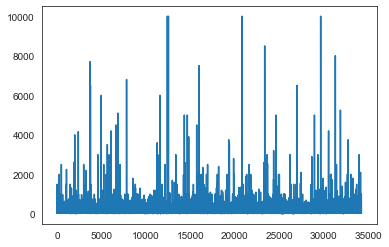

In [301]:
data = df["price"]

plt.plot(data)


## Price

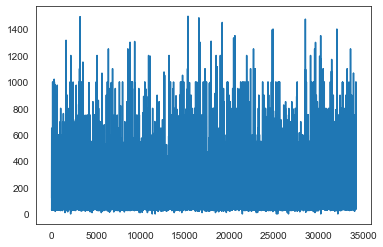

In [302]:
data_1 = df[df["price"] < 1500]

d_1 = data_1["price"]

plt.plot(d_1)

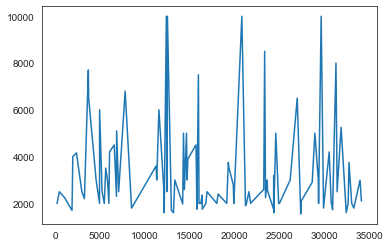

In [303]:
data_2 = df[df["price"] > 1500]

d_2 = data_2["price"]
plt.plot(d_2)

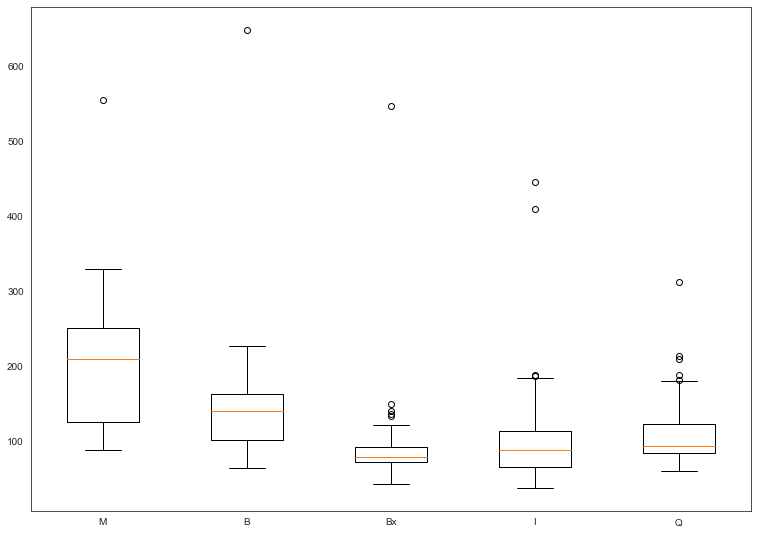

In [304]:
data = [manhattan['price'], brooklyn['price'], bronx['price'], island['price'], queens['price']] 
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(data) 

# x-axis labels 
ax.set_xticklabels(['M', 'B',  
                    'Bx', 'I', 'Q']) 
  
  
# show plot 
plt.show()  

## Price According to Room Type

In [305]:
p1=df.pivot_table(index=["room_type", "price"])
p1.iloc[:100]

availability_365  calculated_host_listings_count  \
room_type       price                                                     
Entire home/apt 0             36.500000                        1.000000   
                10           120.833333                        1.500000   
                11           261.000000                        1.000000   
                12             0.000000                        1.000000   
                15           250.000000                        1.000000   
...                                 ...                             ...   
                119           90.750000                        2.315789   
                120           78.951923                        1.865385   
                121           77.333333                        2.777778   
                122          119.285714                        1.380952   
                123           94.880000                        3.480000   

                            host_id            id   latitude  longitude  \
room_type       price                                                     
Entire home/apt 0      1.192073e+07  2.077920e+07  40.729645 -73.961210   
                10     8.622719e+07  1.988214e+07  40.706115 -73.913185   
                11     1.097260e+08  1.662061e+07  40.689940 -73.915560   
                12     3.737986e+06  1.692753e+07  40.705880 -74.015900   
                15     1.302210e+08  3.529996e+07  40.758885 -73.914430   
...                             ...           ...        ...        ...   
                119    4.966460e+07  1.642099e+07  40.715683 -73.952310   
                120    4.834014e+07  1.728588e+07  40.725696 -73.951991   
                121    5.611576e+07  1.578571e+07  40.707866 -73.950293   
                122    3.251827e+07  1.347728e+07  40.743799 -73.949519   
                123    8.418458e+07  1.925060e+07  40.705324 -73.961495   

                       minimum_nights  number_of_reviews  reviews_per_month  
room_type       price                                                        
Entire home/apt 0            4.000000           1.500000           0.150000  
                10           6.666667          15.666667           1.080000  
                11           2.000000         113.000000           3.860000  
                12         300.000000           0.000000                NaN  
                15           2.000000           0.000000                NaN  
...                               ...                ...                ...  
                119          5.473684          27.631579           1.249857  
                120          8.369231          23.750000           1.134110  
                121          9.333333          14.055556           0.556250  
                122          3.523810          36.666667           1.271111  
                123          9.800000          17.280000           1.146842  

[100 rows x 9 columns]

In [306]:
df["room_type"].value_counts()

Entire home/apt    17829
Private room       15594
Shared room          803
Name: room_type, dtype: int64

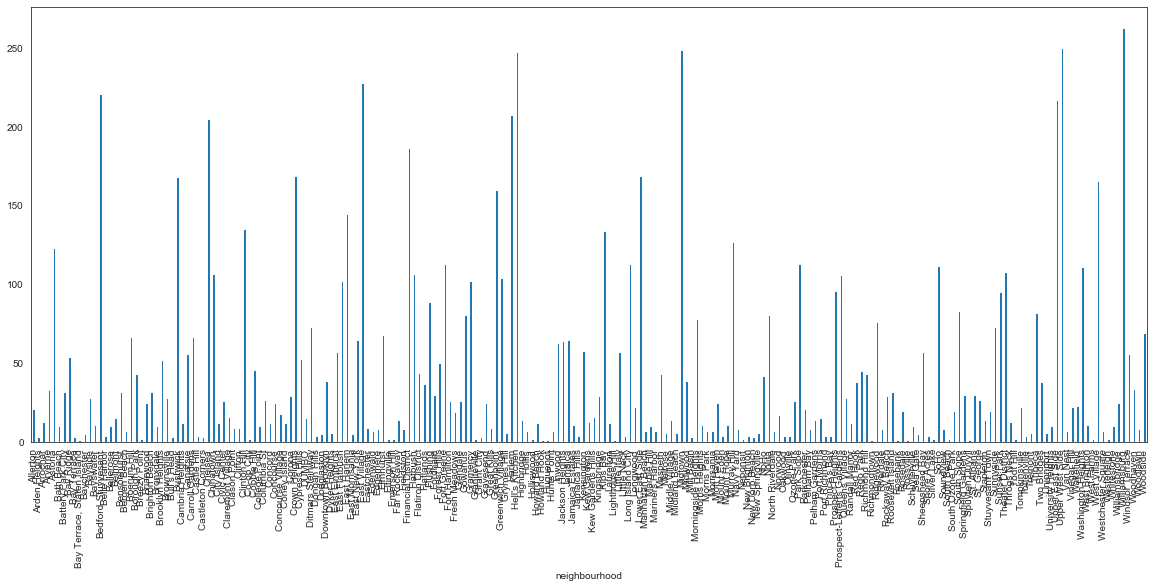

In [307]:
df.groupby('neighbourhood')['price'].nunique().plot(kind='bar', figsize = (20,8))
plt.show()

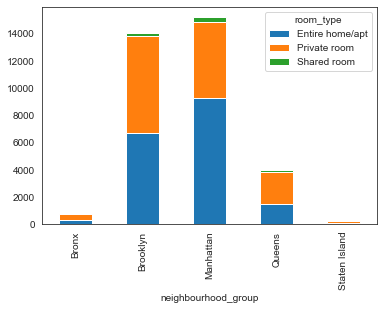

In [308]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby(['neighbourhood_group','room_type']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [309]:
import plotly.express as px


fig = px.treemap(df.sort_values(by = 'room_type', ascending = False).reset_index(drop = True), 
                 path = ['neighbourhood_group', 'neighbourhood'], values = 'price', height = 700,
                 title = 'Number of Confirmed Cases', color_discrete_sequence = px.colors.qualitative.Dark2)

fig.data[0].textinfo = 'label+text+value'

fig.show()



In [310]:
fig = px.treemap(df.sort_values(by = 'room_type', ascending = False).reset_index(drop = True), 
                 path = ['neighbourhood_group', 'neighbourhood','room_type'], values = 'price', height = 700,
                 title = 'Number of Confirmed Cases', color_discrete_sequence = px.colors.qualitative.Dark2)

fig.data[0].textinfo = 'label+text+value'

fig.show()

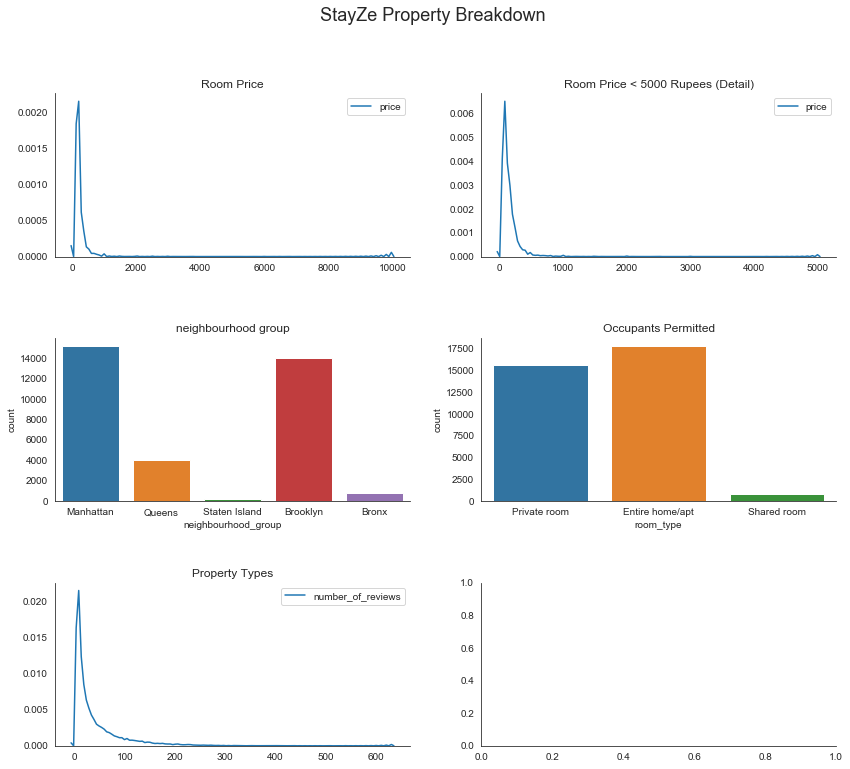

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

f, axarr = plt.subplots(3, 2, figsize=(14, 12))
plt.suptitle('StayZe Property Breakdown', fontsize=18)
f.subplots_adjust(hspace=0.5)

sns.kdeplot(df.price, ax=axarr[0][0])
axarr[0][0].set_title("Room Price")

sns.kdeplot(df.price.where(lambda v: v <= 5000), ax=axarr[0][1])
axarr[0][1].set_title("Room Price < 5000 Rupees (Detail)")

sns.countplot(df.neighbourhood_group, ax=axarr[1][0])
axarr[1][0].set_title("neighbourhood group")

sns.countplot(df.room_type, ax=axarr[1][1])
axarr[1][1].set_title("Occupants Permitted")

sns.kdeplot(df.number_of_reviews, ax=axarr[2][0])
axarr[2][0].set_title("Property Types")

# sns.countplot(stays.service_value, ax=axarr[2][1])
# axarr[2][1].set_title("Verified Yes/No")

sns.despine()

In [312]:
!pip install folium

In [313]:
!pip install plotly

In [314]:

import plotly.express as px
import folium

stays_lat_long = df.groupby('neighbourhood').first().loc[:, ['longitude', 'latitude']].assign(
    n = df.groupby('neighbourhood').neighbourhood.count()
)

m = folium.Map(
    location=[40.76, -73.895],
    zoom_start=4
)

max_n_stays = stays_lat_long.n.max()

stays_lat_long.apply(lambda ll: folium.Circle(radius=2000 * (ll.n / max_n_stays),
                                              location=[ll.latitude, ll.longitude],
                                              fill=True,
                                              color='indianred',
                                              popup=ll.name).add_to(m), axis='columns')

m

In [315]:
import folium

stays_lat_long = df.groupby('neighbourhood_group').first().loc[:, ['longitude', 'latitude']].assign(
    n = df.groupby('neighbourhood_group').neighbourhood.count()
)

m = folium.Map(
    location=[40.76, -73.895],
    zoom_start=4
)

max_n_stays = stays_lat_long.n.max()

stays_lat_long.apply(lambda ll: folium.Circle(radius=2000 * (ll.n / max_n_stays),
                                              location=[ll.latitude, ll.longitude],
                                              fill=True,
                                              color='indianred',
                                              popup=ll.name).add_to(m), axis='columns')

m